In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [3]:
!mkdir -p data-quality-and-feature-engineering/datasets
!mkdir -p data-quality-and-feature-engineering/notebooks
!mkdir -p data-quality-and-feature-engineering/scripts

In [4]:
!kaggle datasets download -d spscientist/students-performance-in-exams

Dataset URL: https://www.kaggle.com/datasets/spscientist/students-performance-in-exams
License(s): unknown
  0% 0.00/8.70k [00:00<?, ?B/s]
100% 8.70k/8.70k [00:00<00:00, 31.4MB/s]


In [5]:
!unzip students-performance-in-exams.zip -d data-quality-and-feature-engineering/datasets/

Archive:  students-performance-in-exams.zip
  inflating: data-quality-and-feature-engineering/datasets/StudentsPerformance.csv  


In [6]:
!ls data-quality-and-feature-engineering/datasets

StudentsPerformance.csv


In [7]:
df = pd.read_csv(
    "data-quality-and-feature-engineering/datasets/StudentsPerformance.csv"
)
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


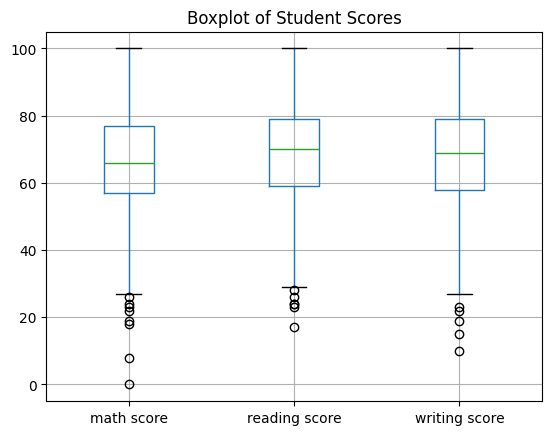

In [8]:
numerical_cols = ["math score", "reading score", "writing score"]
plt.figure()
df[numerical_cols].boxplot()
plt.title("Boxplot of Student Scores")
plt.show()

In [9]:
Q1 = df["math score"].quantile(0.25)
Q3 = df["math score"].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

lower_bound, upper_bound

(np.float64(27.0), np.float64(107.0))

In [10]:
outliers = df[
    (df["math score"] < lower_bound) |
    (df["math score"] > upper_bound)
]

outliers.shape

(8, 8)

In [12]:
df_no_outliers = df[
    (df["math score"] >= lower_bound) &
    (df["math score"] <= upper_bound)
]
df.shape, df_no_outliers.shape

((1000, 8), (992, 8))

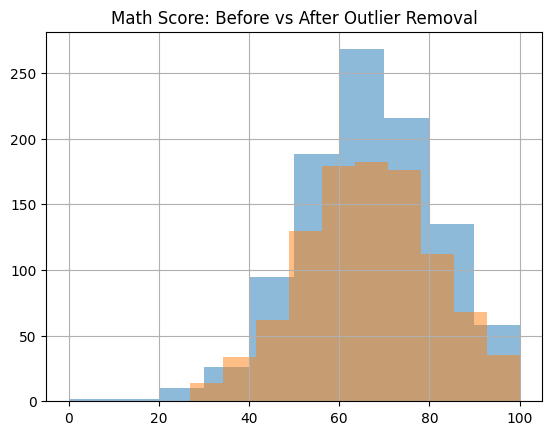

In [13]:
plt.figure()
df["math score"].hist(alpha=0.5)
df_no_outliers["math score"].hist(alpha=0.5)
plt.title("Math Score: Before vs After Outlier Removal")
plt.show()

## Outlier Analysis Observations

- Outliers were identified using the Interquartile Range (IQR) method.
- A small number of extreme values were detected in the math score feature.
- Removing outliers slightly reduced the dataset size.
- Outlier treatment should be applied carefully, especially in educational datasets where low or high scores may be valid.